In [1]:
using StatsBase,StatsPlots, DataFrames, Distributions

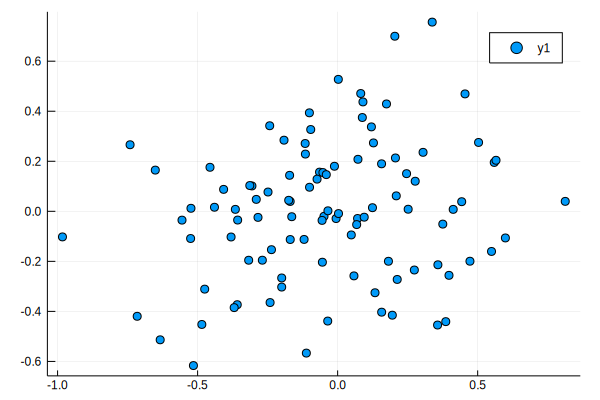

In [153]:
data = vcat([0.3*randn(2) for i = 1:100],
    [[1,1] + 0.3*randn(2) for i = 1:100],
    [[1,-1] + 0.3*randn(2) for i = 1:100]);
xdata = zeros(100)
ydata = zeros(100)
for i in 1:100
    xdata[i] = data[i][1]
    ydata[i] = data[i][2]
end

scatter(xdata,ydata)

In [154]:
function point_distance(x1, x2)
    sum = 0
    for i in 1:length(x1)
        sum += (x1[i] - x2[i]) ^ 2
    end
    dist = sqrt(sum)
    return dist
end

point_distance (generic function with 2 methods)

In [155]:
function my_kmeans(data , k, iter = 200, stop = 0.001)
    centroids = sample(data,k)
    new_centroids = copy(centroids)
    
    ci = Array{Int64}(undef,length(data))
    
 for i in 1:iter
        for j in 1:length(data) 
            
            point = data[j]
            distances = zeros(k)
            for ct in 1:k
                distances[ct] = point_distance(point,centroids[ct])
            end

            ci[j] = findmin(distances)[2]

        end
    
    for i in 1:k
        group = Array{Array{Float64,1},1}(undef,0)
        for j in 1:length(data)
            if(ci[j] == i)
                push!(group,data[j])
            end
        end
        new_centroids[i] = mean(group)
    end
    
    displacement = 0.0
    for i in 1:k
        displacement += point_distance(new_centroids[i],centroids[i])
    end
        
    centroids = copy(new_centroids)
    
    if(displacement < stop)
        break
    end
        
 end
 return centroids, ci

end

my_kmeans (generic function with 3 methods)

In [156]:
result = my_kmeans(data, 3)

(Array{Float64,1}[[-0.0391898, -0.00724912], [0.993036, 0.98965], [1.02612, -0.967713]], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [157]:
g1x = Array{Float64,1}(undef,0);
g1y = Array{Float64,1}(undef,0);
g2x = Array{Float64,1}(undef,0);
g2y = Array{Float64,1}(undef,0);
g3x = Array{Float64,1}(undef,0);
g3y = Array{Float64,1}(undef,0);
cx = Array{Float64,1}(undef,0);
cy = Array{Float64,1}(undef,0);

In [158]:
for i in 1:k
    push!(cx,result[1][i][1])
    push!(cy,result[1][i][2])
end

for i in 1:length(data)
    if result[2][i] == 1
        push!(g1x,data[i][1])
        push!(g1y,data[i][2])
    end
    if result[2][i] == 2
        push!(g2x,data[i][1])
        push!(g2y,data[i][2])
    end
    if result[2][i] == 3
        push!(g3x,data[i][1])
        push!(g3y,data[i][2])
    end
end

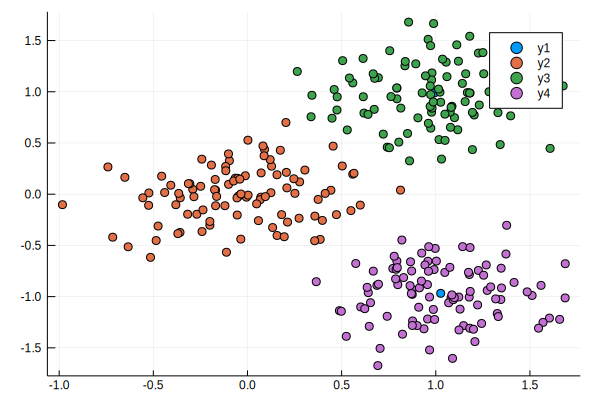

In [159]:
scatter(cx,cy)
scatter!(g1x,g1y)
scatter!(g2x,g2y)
scatter!(g3x,g3y)